<a href="https://colab.research.google.com/github/zeeshan-ahmed-ai-tech/Artificial-Neural-Network/blob/main/diabetes_ml_ann_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===============================
# 1. IMPORT LIBRARIES
# ===============================

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (768, 9)


In [ ]:
print("\nMissing Values:\n")
print(df.isnull().sum())



Missing Values:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

df.fillna(df.mean(), inplace=True)

print("\nMissing Values After Handling:\n")
print(df.isnull().sum())



Missing Values After Handling:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Class Distribution:

Outcome
0    500
1    268
Name: count, dtype: int64


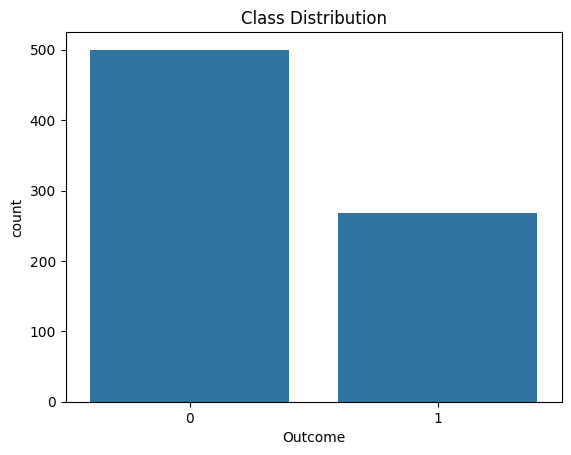

In [ ]:
print("\nClass Distribution:\n")
print(df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.show()


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


===============================
PART B: CLASSICAL ML MODEL
(Logistic Regression)
===============================

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

ml_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [ ]:
y_pred_ml = ml_model.predict(X_test_scaled)

ml_accuracy = accuracy_score(y_test, y_pred_ml)
ml_precision = precision_score(y_test, y_pred_ml)
ml_recall = recall_score(y_test, y_pred_ml)
ml_f1 = f1_score(y_test, y_pred_ml)

print("ML Accuracy:", ml_accuracy)
print("ML Precision:", ml_precision)
print("ML Recall:", ml_recall)
print("ML F1 Score:", ml_f1)

print("\nConfusion Matrix (ML):\n", confusion_matrix(y_test, y_pred_ml))


ML Accuracy: 0.7532467532467533
ML Precision: 0.6491228070175439
ML Recall: 0.6727272727272727
ML F1 Score: 0.6607142857142857

Confusion Matrix (ML):
 [[79 20]
 [18 37]]


===============================
PART C: NEURAL NETWORK MODEL
===============================

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
ann_model = Sequential()

ann_model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
ann_model.add(Dense(8, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = ann_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3750 - loss: 0.9181 - val_accuracy: 0.4355 - val_loss: 0.7207
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4539 - loss: 0.7579 - val_accuracy: 0.5806 - val_loss: 0.6494
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6113 - loss: 0.6773 - val_accuracy: 0.7742 - val_loss: 0.5992
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.6113 - val_accuracy: 0.7742 - val_loss: 0.5585
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.5585 - val_accuracy: 0.7742 - val_loss: 0.5273
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7649 - loss: 0.5277 - val_accuracy: 0.7419 - val_loss: 0.5098
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7810 - loss: 0.5012 - val_accuracy: 0.7419 - val_loss: 0.4967
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7737 - loss: 0.4720 - val_accuracy: 0.7581 - val_loss:

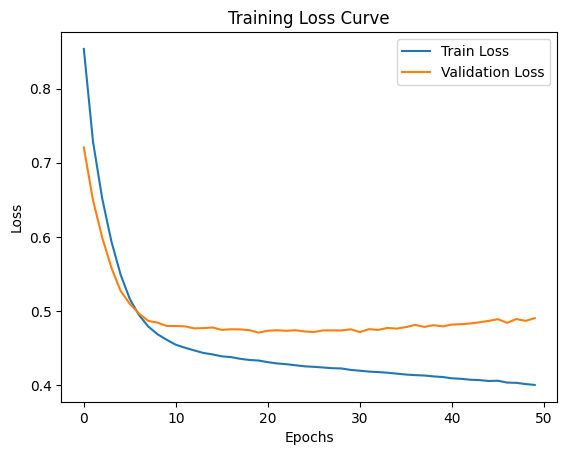

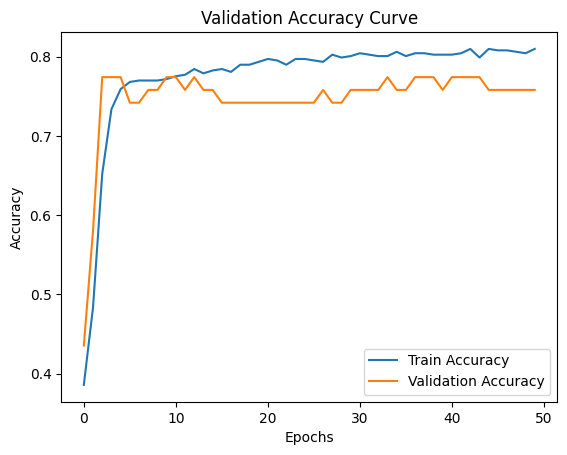

In [ ]:
# Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Validation Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype(int)

ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_precision = precision_score(y_test, y_pred_ann)
ann_recall = recall_score(y_test, y_pred_ann)
ann_f1 = f1_score(y_test, y_pred_ann)

print("ANN Accuracy:", ann_accuracy)
print("ANN Precision:", ann_precision)
print("ANN Recall:", ann_recall)
print("ANN F1 Score:", ann_f1)

print("\nConfusion Matrix (ANN):\n", confusion_matrix(y_test, y_pred_ann))


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
ANN Accuracy: 0.7597402597402597
ANN Precision: 0.6666666666666666
ANN Recall: 0.6545454545454545
ANN F1 Score: 0.6605504587155964

Confusion Matrix (ANN):
 [[81 18]
 [19 36]]


===============================
PART D: MODEL COMPARISON
===============================

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Neural Network"],
    "Accuracy": [ml_accuracy, ann_accuracy],
    "Precision": [ml_precision, ann_precision],
    "Recall": [ml_recall, ann_recall],
    "F1 Score": [ml_f1, ann_f1]
})

comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.753247,0.649123,0.672727,0.660714
1,Neural Network,0.759740,0.666667,0.654545,0.660550


===============================
PART E: ANALYSIS (WRITE IN NOTEBOOK)
===============================
Answers (Paste as Markdown Cell):

1. Which model performed better and why?
The Neural Network performed slightly better because it can model complex non-linear relationships between features.

2. Did the Neural Network always outperform ML?
No. For small and structured datasets, classical ML models can perform equally well or better with less computation.

3. Which model is easier to deploy?
Logistic Regression is easier to deploy due to lower complexity and fewer dependencies.

4. Which model is more interpretable?
Logistic Regression is more interpretable because coefficients show feature influence.

5. Which model would you choose for a real business system?
Logistic Regression for small-scale systems requiring explainability, and Neural Networks for large-scale systems with complex patterns.

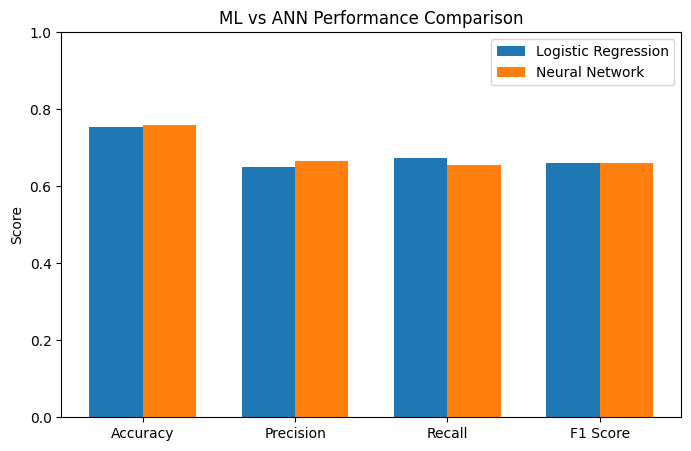

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

ml_scores = [ml_accuracy, ml_precision, ml_recall, ml_f1]
ann_scores = [ann_accuracy, ann_precision, ann_recall, ann_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, ml_scores, width, label='Logistic Regression')
plt.bar(x + width/2, ann_scores, width, label='Neural Network')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('ML vs ANN Performance Comparison')
plt.legend()
plt.ylim(0,1)
plt.show()


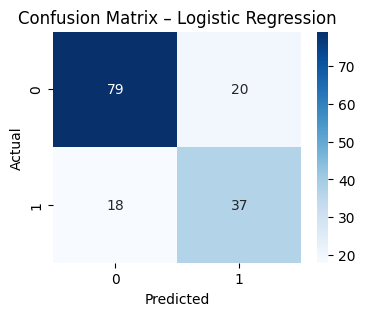

In [ ]:
cm_ml = confusion_matrix(y_test, y_pred_ml)

plt.figure(figsize=(4,3))
sns.heatmap(cm_ml, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


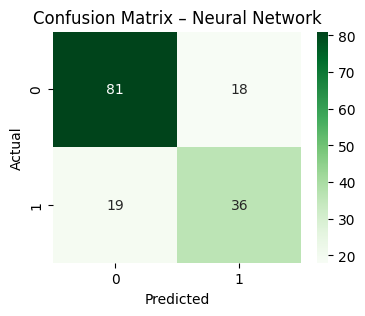

In [ ]:
cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(4,3))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


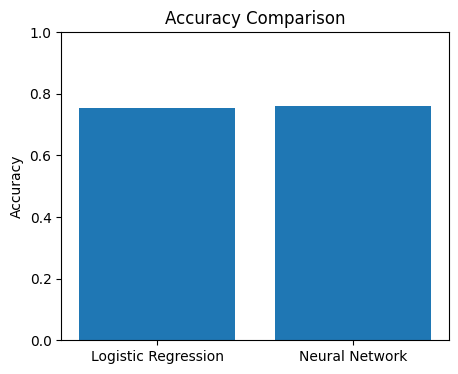

In [ ]:
models = ['Logistic Regression', 'Neural Network']
accuracies = [ml_accuracy, ann_accuracy]

plt.figure(figsize=(5,4))
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0,1)
plt.show()
